In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
data= pd.read_csv("anime.csv")

In [4]:
data.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [6]:
data.describe()

,anime_id,rating,members
count,12294.000000,12064.000000,1.229400e+04
mean,14058.221653,6.473902,1.807134e+04
std,11455.294701,1.026746,5.482068e+04
min,1.000000,1.670000,5.000000e+00
25%,3484.250000,5.880000,2.250000e+02
50%,10260.500000,6.570000,1.550000e+03
75%,24794.500000,7.180000,9.437000e+03
max,34527.000000,10.000000,1.013917e+06


In [7]:
data.isnull().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [10]:
data1 = data.dropna()
data1

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In [11]:
data1.isnull().sum()

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64

In [12]:
data1.shape

(12017, 7)

In [13]:
data1.duplicated().sum()

0

(array([   6.,   48.,  270.,  721., 1807., 3649., 3817., 1465.,  225.,
           9.]),
 array([ 1.67 ,  2.503,  3.336,  4.169,  5.002,  5.835,  6.668,  7.501,
         8.334,  9.167, 10.   ]),
 <BarContainer object of 10 artists>)

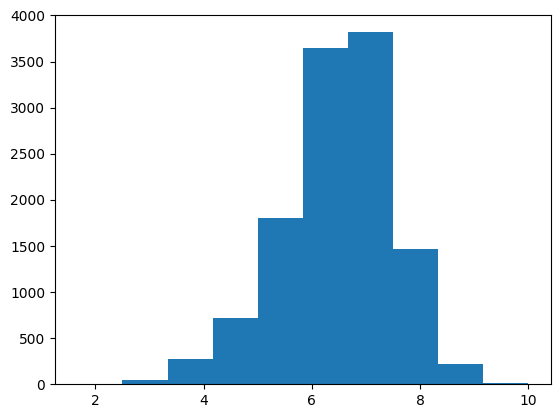

In [16]:
plt.hist(data1['rating'])



<Axes: ylabel='count'>

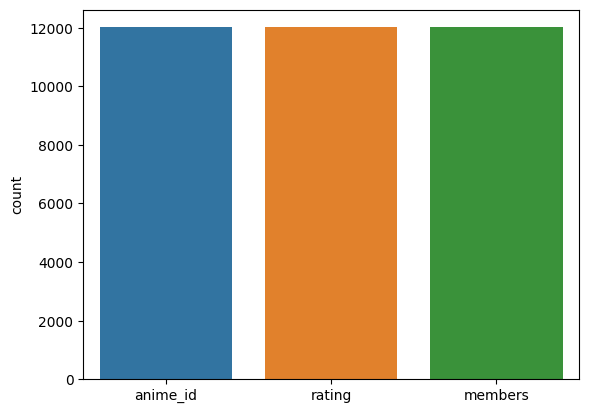

In [18]:
sns.countplot(data1)

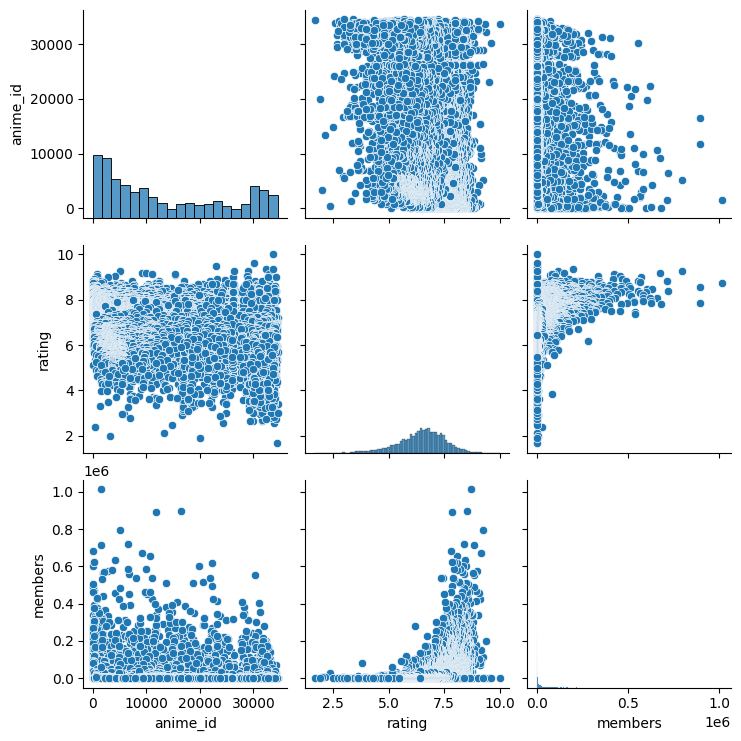

In [19]:
sns.pairplot(data1)

In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data1['type'] = le.fit_transform(data1['type'])
data1['episodes'] = le.fit_transform(data1['episodes'])
data1['rating'] = le.fit_transform(data1['rating'])
data1['members'] = le.fit_transform(data1['members'])

In [27]:

# Normalize 'rating' feature
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data1['rating_normalized'] = scaler.fit_transform(data1['rating'].values.reshape(-1, 1))

data1['rating_normalized']

0        0.994975
1        0.991625
2        0.989950
3        0.988275
4        0.986600
           ...   
12289    0.185930
12290    0.207705
12291    0.306533
12292    0.323283
12293    0.403685
Name: rating_normalized, Length: 12017, dtype: float64

In [56]:

from sklearn.metrics.pairwise import cosine_similarity

def recommend_anime(target_anime_name, data, threshold=0.8):


  # Check if the target anime exists in the dataset
  if target_anime_name not in data['name'].values:
    print("Target anime not found in the dataset.")
    return []

  # Get the feature vector for the target anime
  target_anime_features = data[data1['name'] == target_anime_name].drop(['name', 'rating'], axis=1).values

  # Calculate cosine similarity scores with all other anime
  similarity_scores = cosine_similarity(target_anime_features, data1.drop(['name', 'rating'], axis=1).values)

  # Get indices of anime sorted by similarity (excluding the target anime itself)
  sorted_indices = np.argsort(similarity_scores, axis=1)[0][::-1][1:]

  # Collect recommended anime names based on the threshold
  recommendations = []
  for idx in sorted_indices:
    anime_name = data.iloc[idx]['name']
    similarity = similarity_scores[0][idx]
    if similarity >= threshold:
      recommendations.append((anime_name, similarity))

  return recommendations



In [57]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score

# Split the dataset into training and testing sets
train_data, test_data = train_test_split(data1, test_size=0.2, random_state=42)

def evaluate_recommendations(test_data, recommendations, k=10):


  relevant_items = 0
  recommended_items = 0
  true_positives = 0

  for anime_name in test_data['name'].values:
    if anime_name in recommendations:
      recommended_items += k
      relevant_items += len(test_data[test_data['name'] == anime_name])
      for recommended_anime in recommendations[anime_name][:k]:
        if recommended_anime in test_data[test_data['name'] == anime_name]['name'].values:
          true_positives += 1

  if recommended_items == 0:
    precision = 0
  else:
    precision = true_positives / recommended_items

  if relevant_items == 0:
    recall = 0
  else:
    recall = true_positives / relevant_items

  if precision + recall == 0:
    f1_score = 0
  else:
    f1_score = 2 * (precision * recall) / (precision + recall)

  return precision, recall, f1_score

# Generate recommendations for the test set
test_recommendations = {}
for anime_name in test_data['name'].values:
  test_recommendations[anime_name] = [anime for anime, _ in recommend_anime(anime_name, train_data)]

# Evaluate the recommendations
precision, recall, f1 = evaluate_recommendations(test_data, test_recommendations)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

# Analyze the performance and identify areas of improvement
# ...
# Potential areas of improvement could include:
# - Using more advanced similarity metrics (e.g., adjusted cosine similarity)
# - Incorporating additional features (e.g., user demographics, viewing history)
# - Employing collaborative filtering techniques
# - Experimenting with different recommendation algorithms (e.g., matrix factorization, deep learning models)


Target anime not found in the dataset.
Target anime not found in the dataset.
Target anime not found in the dataset.
Target anime not found in the dataset.
Target anime not found in the dataset.
Target anime not found in the dataset.
Target anime not found in the dataset.
Target anime not found in the dataset.
Target anime not found in the dataset.
Target anime not found in the dataset.
Target anime not found in the dataset.
Target anime not found in the dataset.
Target anime not found in the dataset.
Target anime not found in the dataset.
Target anime not found in the dataset.
Target anime not found in the dataset.
Target anime not found in the dataset.
Target anime not found in the dataset.
Target anime not found in the dataset.
Target anime not found in the dataset.
Target anime not found in the dataset.
Target anime not found in the dataset.
Target anime not found in the dataset.
Target anime not found in the dataset.
Target anime not found in the dataset.
Target anime not found in

In [ ]:
# 1. Can you explain the difference between user-based and item-based collaborative filtering?

# User-based collaborative filtering:
# - Focuses on finding users with similar tastes to the target user.
# - Recommends items that those similar users have liked.
# - Works well when there are more users than items.
# - Can be computationally expensive for large user bases.

# Item-based collaborative filtering:
# - Focuses on finding items that are similar to the items the target user has liked.
# - Recommends items that are often liked together with the target user's liked items.
# - Works well when there are more items than users.
# - Can be precomputed for faster recommendations.

# 2. What is collaborative filtering, and how does it work?

# Collaborative filtering is a recommendation technique that leverages the collective behavior of users to predict what a particular user might like.

# How it works:
# 1. Gather user-item interaction data (e.g., ratings, purchases, views).
# 2. Identify similar users or items based on their interaction patterns.
# 3. Predict the target user's preferences for unseen items based on the preferences of similar users or the characteristics of similar items.
# 4. Recommend items with the highest predicted preferences.
